In [1]:
import matplotlib.pyplot as plt

import vis_bench

In [2]:
# Benchmark data directory
data_dir = "C:\\Users\\dosre\\dev\\data-transfer\\data-transfer"
# data_dir = "\\\\wsl.localhost\\Ubuntu\\home\\unix-dosre\\dev\\precision-cascade\\install\\benchmark\\output_data"

# Data specifications
quick_test_reptitions = 200
inner_iters = 200
outer_iters = 300

# Plot specifications
single_figsize = (5, 4.8)
double_figsize = (10, 4.8)
display_lowerbound = True

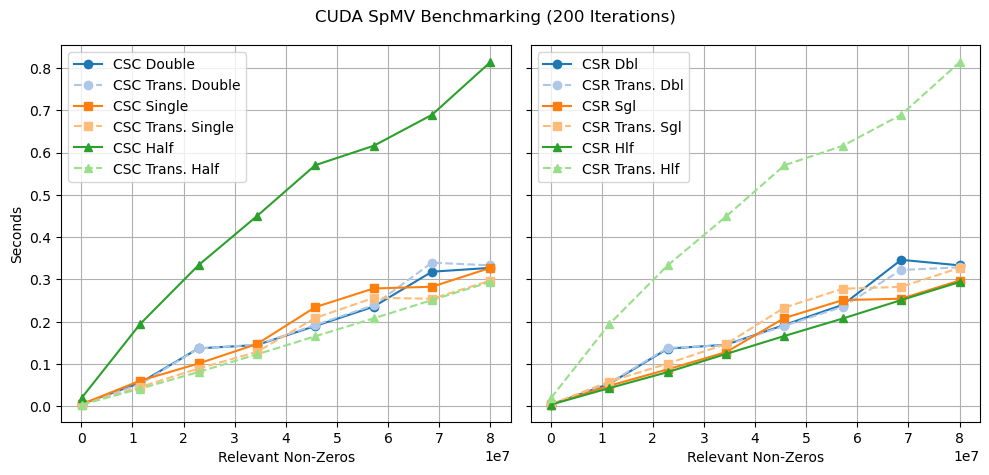

In [3]:
fig, axs = plt.subplots(1, 2, figsize=double_figsize, sharey=True)
ax1, ax2 = axs

li_tup_fname_label_clridx_fmt_1 = [
    ("csc_mv_dbl", "CSC Double", 0, "o-"),
    ("csc_tmv_dbl", "CSC Trans. Double", 1, "o--"),
    ("csc_mv_sgl", "CSC Single", 2, "s-"),
    ("csc_tmv_sgl", "CSC Trans. Single", 3, "s--"),
    ("csc_mv_hlf", "CSC Half", 4, "^-"),
    ("csc_tmv_hlf", "CSC Trans. Half", 5, "^--")
]

vis_bench.plot_data(
    ax1,
    data_dir,
    li_tup_fname_label_clridx_fmt_1,
    vis_bench.load_sparse_data
)

li_tup_fname_label_clridx_fmt_2 = [
    ("csr_mv_dbl", "CSR Dbl", 0, "o-"),
    ("csr_tmv_dbl", "CSR Trans. Dbl", 1, "o--"),
    ("csr_mv_sgl", "CSR Sgl", 2, "s-"),
    ("csr_tmv_sgl", "CSR Trans. Sgl", 3, "s--"),
    ("csr_mv_hlf", "CSR Hlf", 4, "^-"),
    ("csr_tmv_hlf", "CSR Trans. Hlf", 5, "^--")
]

vis_bench.plot_data(
    ax2,
    data_dir,
    li_tup_fname_label_clridx_fmt_2,
    vis_bench.load_sparse_data,
    True
)

fig.suptitle(f"CUDA SpMV Benchmarking ({quick_test_reptitions} Iterations)")
fig.tight_layout()

plt.show()

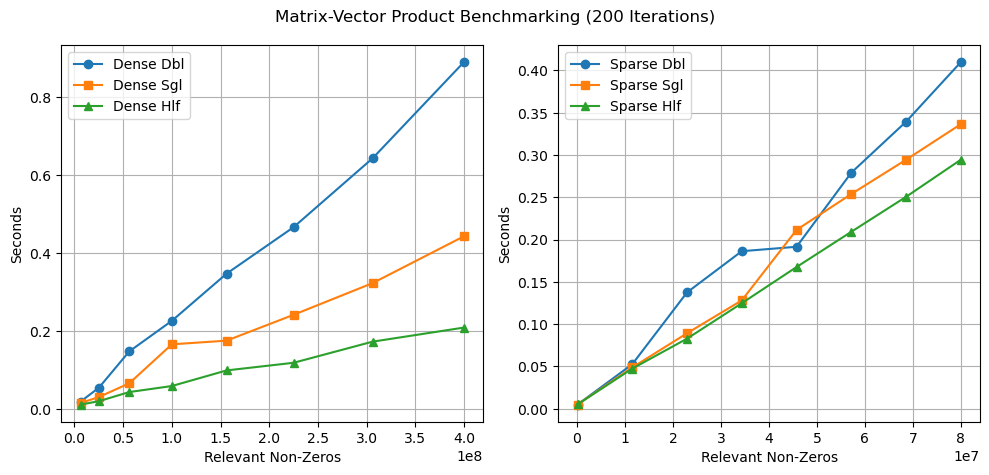

In [4]:
fig, axs = plt.subplots(1, 2, figsize=double_figsize)
ax1, ax2 = axs

li_tup_fname_label_clridx_1 = [
    ("matdense_mv_dbl", "Dense Dbl", 0, "o-"),
    ("matdense_mv_sgl", "Dense Sgl", 2, "s-"),
    ("matdense_mv_hlf", "Dense Hlf", 4, "^-"),
]

vis_bench.plot_data(
    ax1,
    data_dir,
    li_tup_fname_label_clridx_1,
    vis_bench.load_dense_data
)

li_tup_fname_label_clridx_2 = [
    ("matsparse_mv_dbl", "Sparse Dbl", 0, "o-"),
    ("matsparse_mv_sgl", "Sparse Sgl", 2, "s-"),
    ("matsparse_mv_hlf", "Sparse Hlf", 4, "^-"),
]

vis_bench.plot_data(
    ax2,
    data_dir,
    li_tup_fname_label_clridx_2,
    vis_bench.load_sparse_data
)

fig.suptitle(f"Matrix-Vector Product Benchmarking ({quick_test_reptitions} Iterations)")
fig.tight_layout()

plt.show()

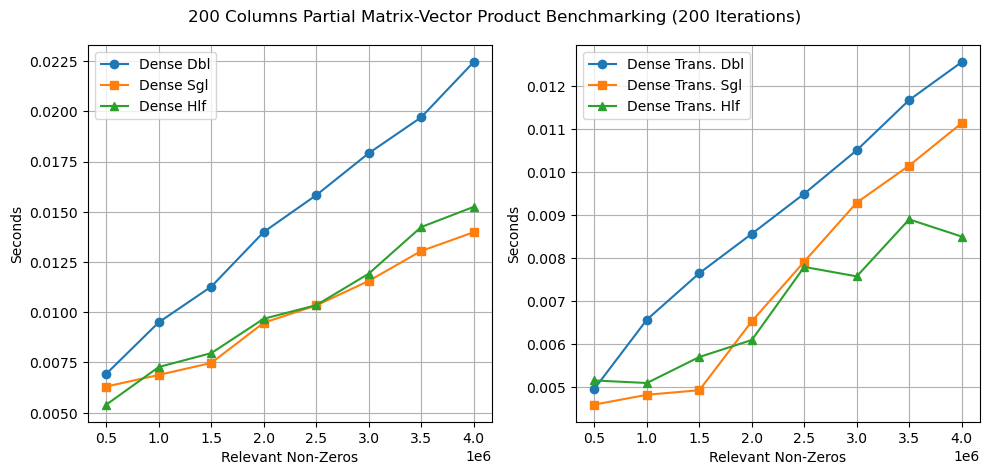

In [5]:
fig, axs = plt.subplots(1, 2, figsize=double_figsize)
ax1, ax2 = axs

def load_subsetcols_data(data_dir, fname):
    data_x, data_y = vis_bench.load_benchmark_csv_us(data_dir, fname)
    data_x = (inner_iters/data_x)*(data_x**2)
    return data_x, data_y

li_tup_fname_label_clridx_1 = [
    ("matdense_subsetcolsmv_dbl", "Dense Dbl", 0, "o-"),
    ("matdense_subsetcolsmv_sgl", "Dense Sgl", 2, "s-"),
    ("matdense_subsetcolsmv_hlf", "Dense Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax1,
    data_dir,
    li_tup_fname_label_clridx_1,
    load_subsetcols_data
)

li_tup_fname_label_clridx_2 = [
    ("matdense_subsetcolstmv_dbl", "Dense Trans. Dbl", 0, "o-"),
    ("matdense_subsetcolstmv_sgl", "Dense Trans. Sgl", 2, "s-"),
    ("matdense_subsetcolstmv_hlf", "Dense Trans. Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax2,
    data_dir,
    li_tup_fname_label_clridx_2,
    load_subsetcols_data
)

fig.suptitle(f"{inner_iters} Columns Partial Matrix-Vector Product Benchmarking ({quick_test_reptitions} Iterations)")
fig.tight_layout()

plt.show()

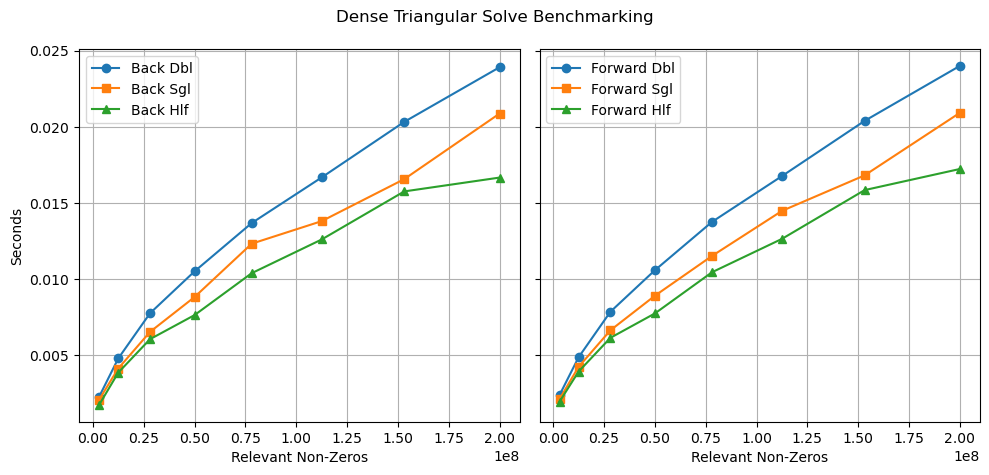

In [6]:
fig, axs = plt.subplots(1, 2, figsize=double_figsize, sharey=True)
ax1, ax2 = axs

li_tup_fname_label_clridx_1 = [
    ("matdense_backsub_dbl", "Back Dbl", 0, "o-"),
    ("matdense_backsub_sgl", "Back Sgl", 2, "s-"),
    ("matdense_backsub_hlf", "Back Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax1, 
    data_dir,
    li_tup_fname_label_clridx_1,
    vis_bench.load_tri_dense_data
)

li_tup_fname_label_clridx_2 = [
    ("matdense_frwdsub_dbl", "Forward Dbl", 0, "o-"),
    ("matdense_frwdsub_sgl", "Forward Sgl", 2, "s-"),
    ("matdense_frwdsub_hlf", "Forward Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax2,
    data_dir,
    li_tup_fname_label_clridx_2,
    vis_bench.load_tri_dense_data,
    True
)

fig.suptitle("Dense Triangular Solve Benchmarking")
fig.tight_layout()

plt.show()

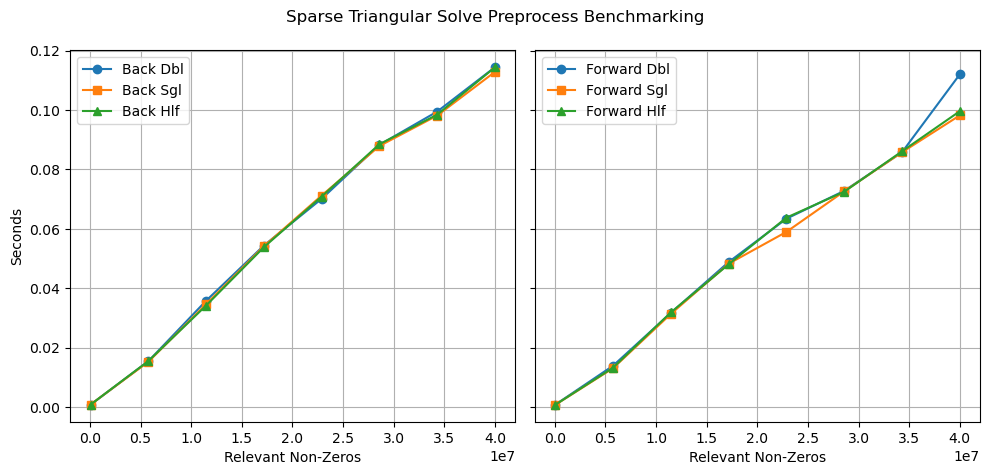

In [7]:
fig, axs = plt.subplots(1, 2, figsize=double_figsize, sharey=True)
ax1, ax2 = axs

li_tup_fname_label_clridx_1 = [
    ("matsparse_backtrsvpreprocess_dbl", "Back Dbl", 0, "o-"),
    ("matsparse_backtrsvpreprocess_sgl", "Back Sgl", 2, "s-"),
    ("matsparse_backtrsvpreprocess_hlf", "Back Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax1, 
    data_dir,
    li_tup_fname_label_clridx_1,
    vis_bench.load_tri_sparse_data
)

li_tup_fname_label_clridx_2 = [
    ("matsparse_frwdtrsvpreprocess_dbl", "Forward Dbl", 0, "o-"),
    ("matsparse_frwdtrsvpreprocess_sgl", "Forward Sgl", 2, "s-"),
    ("matsparse_frwdtrsvpreprocess_hlf", "Forward Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax2,
    data_dir,
    li_tup_fname_label_clridx_2,
    vis_bench.load_tri_sparse_data,
    True
)

fig.suptitle("Sparse Triangular Solve Preprocess Benchmarking")
fig.tight_layout()

plt.show()

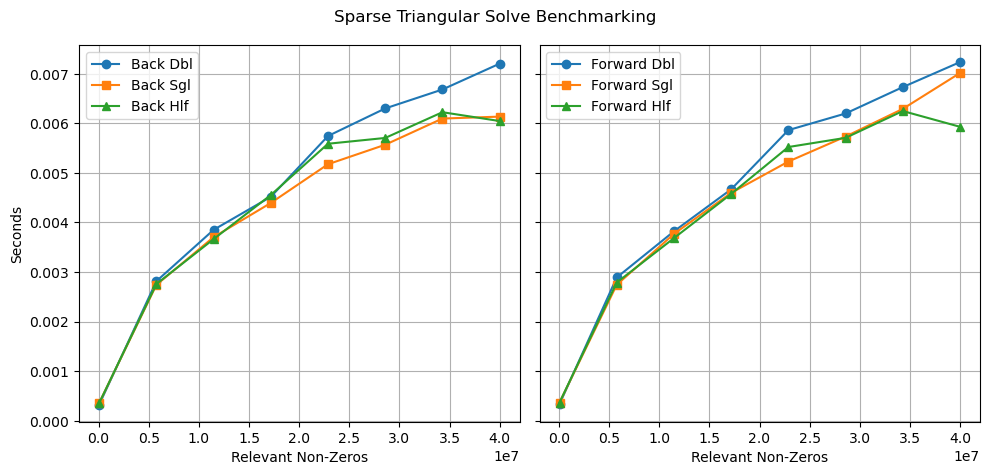

In [8]:
fig, axs = plt.subplots(1, 2, figsize=double_figsize, sharey=True)
ax1, ax2 = axs

li_tup_fname_label_clridx_1 = [
    ("matsparse_fastbacksub_dbl", "Back Dbl", 0, "o-"),
    ("matsparse_fastbacksub_sgl", "Back Sgl", 2, "s-"),
    ("matsparse_fastbacksub_hlf", "Back Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax1, 
    data_dir,
    li_tup_fname_label_clridx_1,
    vis_bench.load_tri_sparse_data
)

li_tup_fname_label_clridx_2 = [
    ("matsparse_fastfrwdsub_dbl", "Forward Dbl", 0, "o-"),
    ("matsparse_fastfrwdsub_sgl", "Forward Sgl", 2, "s-"),
    ("matsparse_fastfrwdsub_hlf", "Forward Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax2,
    data_dir,
    li_tup_fname_label_clridx_2,
    vis_bench.load_tri_sparse_data,
    True
)

fig.suptitle("Sparse Triangular Solve Benchmarking")
fig.tight_layout()

plt.show()

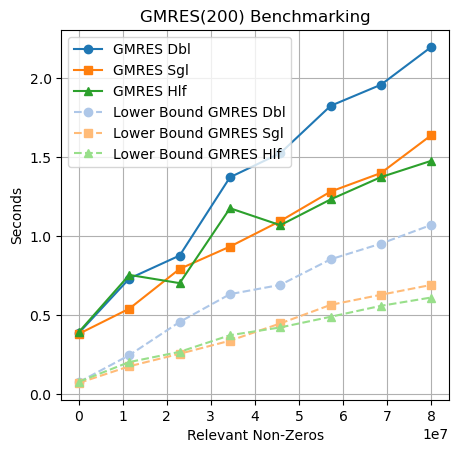

In [9]:
fig, ax = plt.subplots(1, 1, figsize=single_figsize)

li_tup_fname_label_clridx_1 = [
    ("gmressolve_dbl", "GMRES Dbl", 0, "o-"),
    ("gmressolve_sgl", "GMRES Sgl", 2, "s-"),
    ("gmressolve_hlf", "GMRES Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax,
    data_dir,
    li_tup_fname_label_clridx_1,
    vis_bench.load_sparse_data
)

if display_lowerbound:

    def load_gmres_extrapolation(data_dir, tup_extrap_mv):

        data_x, exrtap_data_y = vis_bench.load_benchmark_csv_us(
            data_dir, tup_extrap_mv[0]
        )
        _, mv_data_y = vis_bench.load_benchmark_csv_us(
            data_dir, tup_extrap_mv[1]
        )
        data_x = data_x**1.5
        data_y = exrtap_data_y + mv_data_y

        return data_x, data_y

    li_tup_fname_label_clridx_2 = [
        (["gmressolveextrapdata_dbl", "matsparse_mv_dbl"],
         "Lower Bound GMRES Dbl", 1, "o--"),
        (["gmressolveextrapdata_sgl", "matsparse_mv_sgl"],
         "Lower Bound GMRES Sgl", 3, "s--"),
        (["gmressolveextrapdata_hlf", "matsparse_mv_hlf"],
         "Lower Bound GMRES Hlf", 5, "^--")
    ]

    vis_bench.plot_data(
        ax,
        data_dir,
        li_tup_fname_label_clridx_2,
        load_gmres_extrapolation
    )

ax.set_title(f"GMRES({inner_iters}) Benchmarking")

plt.show()

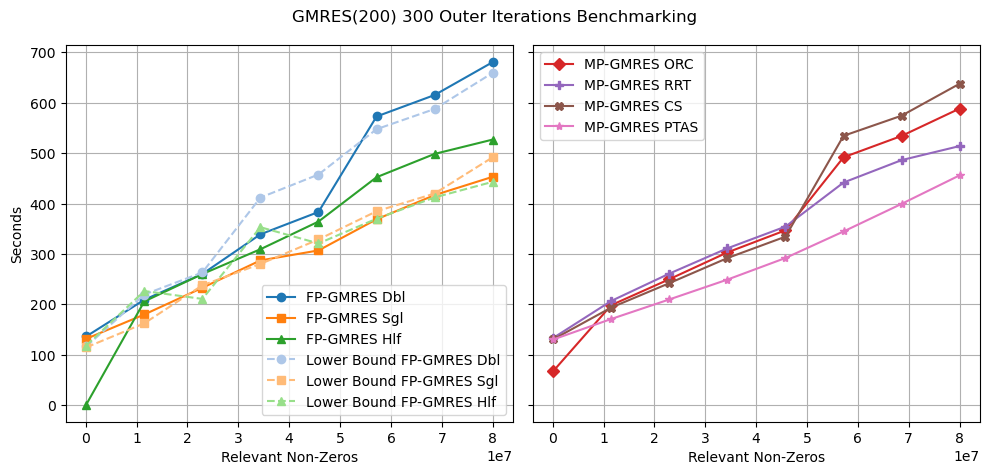

In [10]:
fig, axs = plt.subplots(1, 2, figsize=double_figsize, sharey=True)
ax1, ax2 = axs

li_tup_fname_label_clridx_1 = [
    ("fp_gmres_ir_dbl", "FP-GMRES Dbl", 0, "o-"),
    ("fp_gmres_ir_sgl", "FP-GMRES Sgl", 2, "s-"),
    ("fp_gmres_ir_hlf", "FP-GMRES Hlf", 4, "^-")
]

vis_bench.plot_data(
    ax1,
    data_dir,
    li_tup_fname_label_clridx_1,
    vis_bench.load_sparse_data
)

li_tup_fname_label_clridx_2 = [
    ("outer_restart_count", "MP-GMRES ORC", 6, "D-"),
    ("relative_residual_threshold", "MP-GMRES RRT", 8, "P-"),
    ("check_stagnation", "MP-GMRES CS", 10, "X-"),
    ("project_threshold_after_stagnation", "MP-GMRES PTAS", 12, "*-")
]

vis_bench.plot_data(
    ax2,
    data_dir,
    li_tup_fname_label_clridx_2,
    vis_bench.load_sparse_data,
    True
)

if display_lowerbound:

    def load_fp_gmres_extrapolation(data_dir, fname):

        data_x, dbl_gmres_data = vis_bench.load_sparse_data(
            data_dir, fname
        )
        data_y = outer_iters*dbl_gmres_data

        return data_x, data_y

    li_tup_fname_label_clridx_3 = [
        ("gmressolve_dbl", "Lower Bound FP-GMRES Dbl", 1, "o--"),
        ("gmressolve_sgl", "Lower Bound FP-GMRES Sgl", 3, "s--"),
        ("gmressolve_hlf", "Lower Bound FP-GMRES Hlf", 5, "^--")
    ]

    vis_bench.plot_data(
        ax1,
        data_dir,
        li_tup_fname_label_clridx_3,
        load_fp_gmres_extrapolation
    )

fig.suptitle(f"GMRES({inner_iters}) {outer_iters} Outer Iterations Benchmarking")
fig.tight_layout()

plt.show()

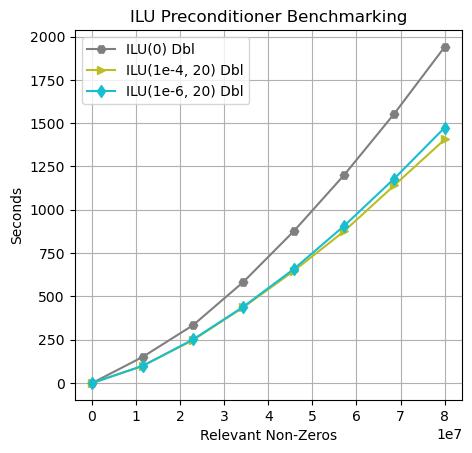

In [11]:
fig, ax = plt.subplots(1, 1, figsize=single_figsize)

li_tup_fname_label_clridx_1 = [
    ("ilu0_precond_dbl", "ILU(0) Dbl", 14, "H-"),
    ("ilutp_em4_20_precond_dbl", "ILU(1e-4, 20) Dbl", 16, ">-"),
    ("ilutp_em6_20_precond_dbl", "ILU(1e-6, 20) Dbl", 18, "d-")
]

vis_bench.plot_data(
    ax,
    data_dir,
    li_tup_fname_label_clridx_1,
    vis_bench.load_sparse_data
)

ax.set_title(f"ILU Preconditioner Benchmarking")

plt.show()

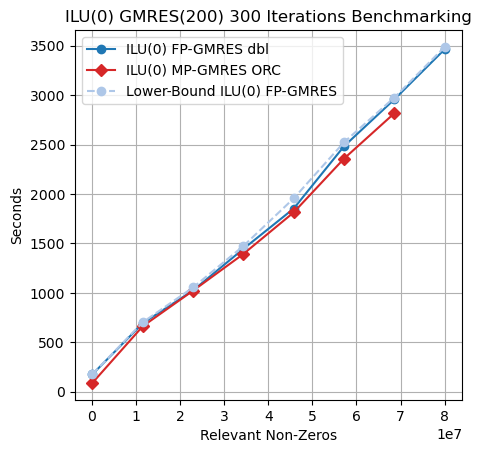

In [12]:
fig, ax = plt.subplots(1, 1, figsize=single_figsize)

li_tup_fname_label_clridx_1 = [
    ("ilu0_fp_gmres_ir", "ILU(0) FP-GMRES dbl", 0, "o-"),
    ("ilu0_outer_restart_count", "ILU(0) MP-GMRES ORC", 6, "D-")
]

vis_bench.plot_data(
    ax,
    data_dir,
    li_tup_fname_label_clridx_1,
    vis_bench.load_sparse_data
)

if display_lowerbound:

    def load_ilu0_fp_gmres_extrapolation(data_dir, dict_fnames):
        
        data_x, data_fp_no_precond = vis_bench.load_sparse_data(
            data_dir, dict_fnames["fp_gmres"]
        )
        _, data_backpre = vis_bench.load_sparse_data(
            data_dir, dict_fnames["back_preprocess"]
        )
        _, data_backsub = vis_bench.load_sparse_data(
            data_dir, dict_fnames["back_substitution"]
        )
        _, data_frwdpre = vis_bench.load_sparse_data(
            data_dir, dict_fnames["forward_preprocess"]
        )
        _, data_frwdsub = vis_bench.load_sparse_data(
            data_dir, dict_fnames["forward_substitution"]
        )
        _, data_ilu0 = vis_bench.load_sparse_data(
            data_dir, dict_fnames["ilu0"]
        )

        data_y = (
            data_fp_no_precond +
            data_backpre +
            outer_iters*inner_iters*data_backsub +
            data_frwdpre +
            outer_iters*inner_iters*data_frwdsub +
            data_ilu0
        )

        return data_x, data_y

    li_tup_fname_label_clridx_2 = [
        (
            {
                "fp_gmres": "fp_gmres_ir_dbl",
                "back_preprocess": "matsparse_backtrsvpreprocess_dbl",
                "back_substitution": "matsparse_fastbacksub_dbl",
                "forward_preprocess": "matsparse_frwdtrsvpreprocess_dbl",
                "forward_substitution": "matsparse_fastfrwdsub_dbl",
                "ilu0": "ilu0_precond_dbl",
            },
            "Lower-Bound ILU(0) FP-GMRES",
            1,
            "o--"
        )
    ]

    vis_bench.plot_data(
        ax,
        data_dir,
        li_tup_fname_label_clridx_2,
        load_ilu0_fp_gmres_extrapolation
    )

ax.set_title(f"ILU(0) GMRES({inner_iters}) {outer_iters} Iterations Benchmarking")

plt.show()